# Ham or Spam Classification using ML and DL models 

For given to you ham-spam data, you are asked to perform text classification.

1-Perform EDA on the data.

2-Apply data cleaning operations.

3-Visualize important tokens of ham and spam messages in the data using wordcloud.

4-Get scores from ML, DL, BERT,  pre-trained model from Huggingface and compare them and interpret the results.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df=df[["v1", "v2"]]
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

##Count of Labels

In [17]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

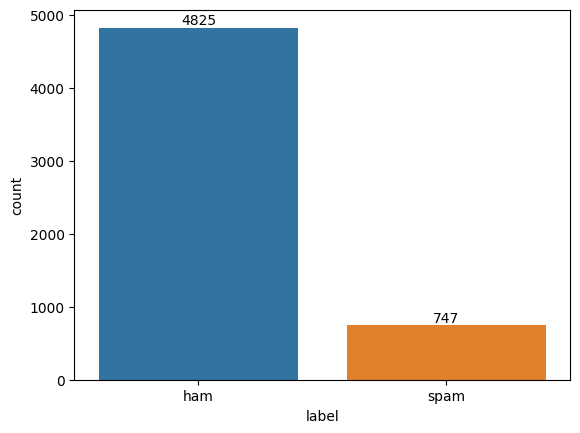

In [18]:
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

In [19]:
df['len'] = df['text'].apply(len)
df.head()

,label,text,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='len', ylabel='Count'>

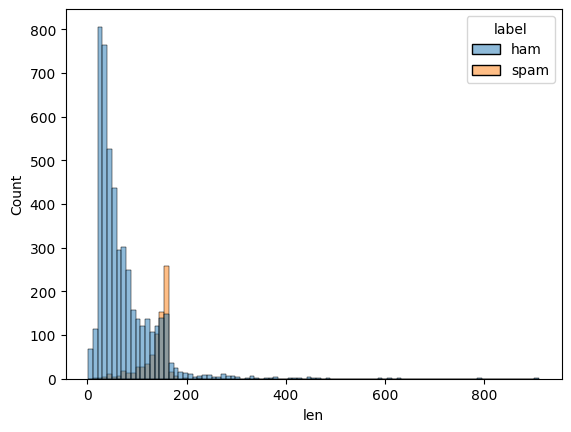

In [20]:
sns.histplot(x="len", data=df, hue="label")

# spam messages generaly longer than ham messages

### Data Cleaning

In [21]:
def cleaning(data):

    #1. Tokenize and lower case
    text_tokens = word_tokenize(data.lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    stop_words = stopwords.words('english')
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

### Worldclouds

#### Detect Labels (Ham and Spam Messages separately)

In [22]:
ham_text = df[df["label"] == "ham"]["text"]
ham_text = ham_text.apply(cleaning)
ham_text

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                     nah think go usf life around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: text, Length: 4825, dtype: object

In [23]:
spam_text = df[df["label"] == "spam"]["text"]
spam_text = spam_text.apply(cleaning)
spam_text

2       free entry wkly comp win fa cup final tkts may...
5       freemsg hey darling week word back like fun st...
8       winner valued network customer selected receiv...
9       mobile month u r entitled update latest colour...
11      six chance win cash pound txt send cost tsandc...
                              ...                        
5537           want explicit sex sec ring cost gsex pobox
5540    asked chatlines inclu free min india cust serv...
5547    contract mobile mnths latest motorola nokia et...
5566    reminder get pound free call credit detail gre...
5567    time tried contact u pound prize claim easy ca...
Name: text, Length: 747, dtype: object

### Collect Words (ham and spam separately)

In [24]:
ham_words = " ".join(ham_text)
ham_words[:100]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif'

In [25]:
spam_words = " ".join(spam_text)
spam_words[:100]

'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c apply f'

### Create worldcloud (ham and spam separately)

In [26]:
from wordcloud import WordCloud

In [27]:
wordcloud_ham = WordCloud(background_color="black",
                          max_words =200,
                          scale=3)

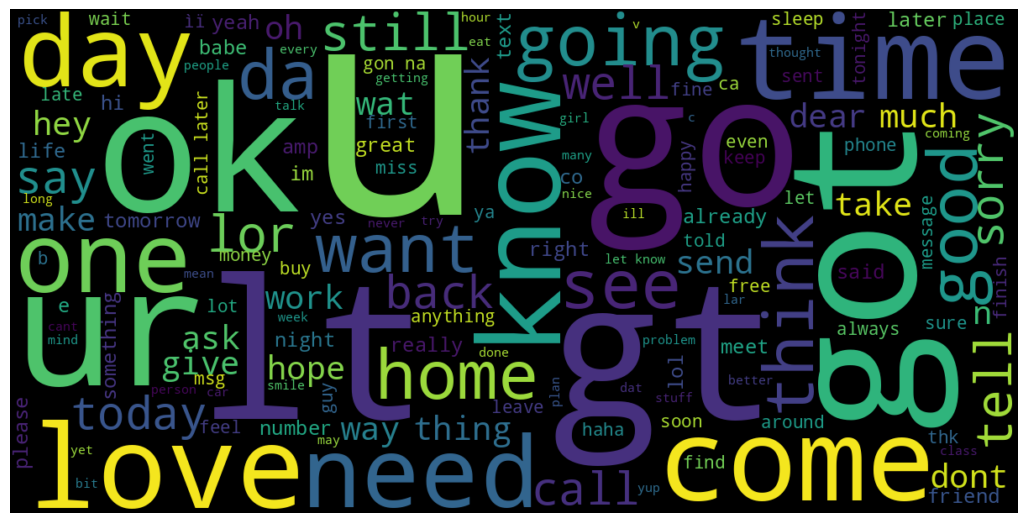

In [28]:
wordcloud_ham.generate(ham_words)

import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_ham,
           interpolation="bilinear")
plt.axis("off")
plt.show()

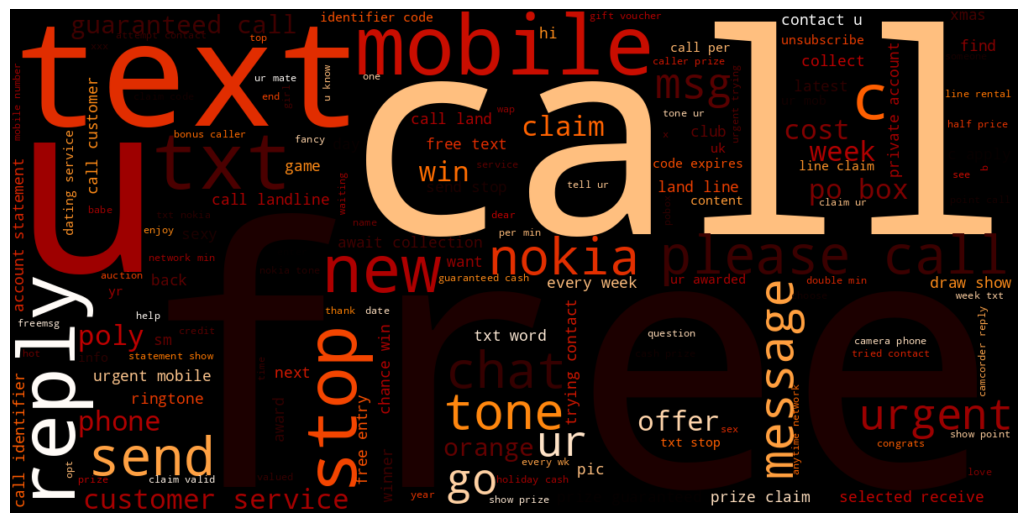

In [29]:
wordcloud_spam = WordCloud(background_color="black",
                           max_words=200,
                           colormap='gist_heat',
                           scale=3)

wordcloud_spam.generate(spam_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_spam,
           interpolation="bilinear")
plt.axis("off")
plt.show()

### Train-test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df["text"].values
y = df["label"].map({"ham":0, "spam":1}).values

# "spam" asign as 1 because our goal label is "spam"

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=101)

### Count Vectorization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(preprocessor=cleaning,
                                   min_df=3,
                                   max_df=0.95)

### TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.95)

### Eval Functions

In [35]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [36]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### Pipeline for Logistic Regression

#### Countvectorizer

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

operations = [("count_vec", count_vectorizer),
              ("log_model", LogisticRegression(C=0.1,
                                               class_weight= "balanced",
                                               random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('count_vec',
                 CountVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('log_model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    random_state=101))])

In [38]:
print("LOG MODEL")
eval(pipe_model, X_train, X_test)

LOG MODEL
[[954  12]
 [ 15 134]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.92      0.90      0.91       149

    accuracy                           0.98      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3859
           1       0.92      0.94      0.93       598

    accuracy                           0.98      4457
   macro avg       0.96      0.97      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [39]:
from sklearn.model_selection import cross_validate

scoring= ["accuracy", "f1", "recall", "precision"]

operations = [("count_vec", count_vectorizer),
              ("log_model", LogisticRegression(C=0.1,
                                               class_weight= "balanced",
                                               random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.973076
train_accuracy     0.981427
test_f1            0.899350
train_f1           0.931637
test_recall        0.896215
train_recall       0.943143
test_precision     0.904321
train_precision    0.920430
dtype: float64

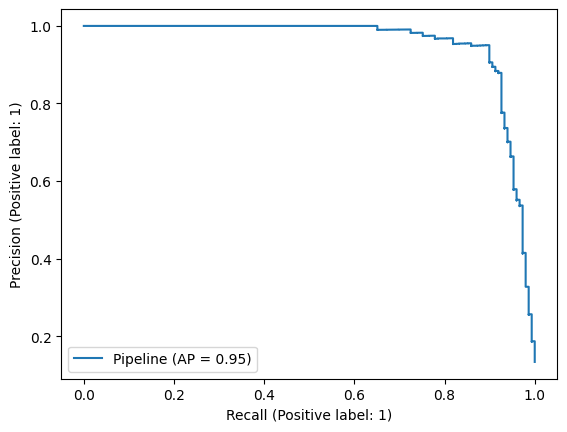

In [40]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [41]:
y_pred = pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

#### Tf-Idf vectorizer

In [42]:
operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("log_model", LogisticRegression(C=1,
                                               class_weight= "balanced",
                                               random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vec',
                 TfidfVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('log_model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=101))])

In [43]:
print("LOG MODEL")
eval(pipe_model, X_train, X_test)

LOG MODEL
[[953  13]
 [ 10 139]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3859
           1       0.92      0.98      0.95       598

    accuracy                           0.99      4457
   macro avg       0.96      0.98      0.97      4457
weighted avg       0.99      0.99      0.99      4457



In [44]:
operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("log_model", LogisticRegression(C=1,
                                               class_weight= "balanced",
                                               random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.972630
train_accuracy     0.985017
test_f1            0.899984
train_f1           0.946022
test_recall        0.913051
train_recall       0.978447
test_precision     0.889688
train_precision    0.915691
dtype: float64

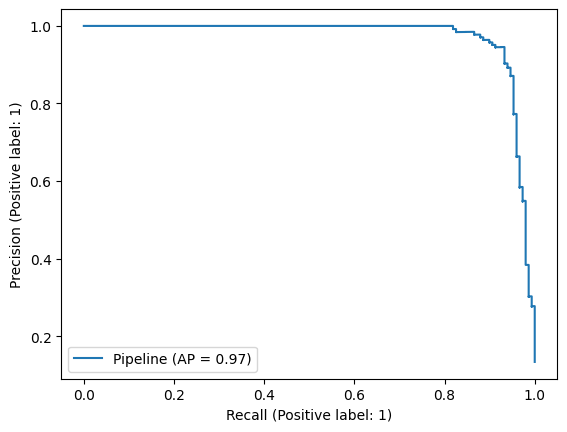

In [45]:
PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [46]:
y_pred = pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

### Pipeline for Naive Bayes

#### Countvectorizer

In [47]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

operations = [("count_vec", count_vectorizer),
              ("naive_model",  MultinomialNB(alpha=1))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('count_vec',
                 CountVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('naive_model', MultinomialNB(alpha=1))])

In [48]:
print("NB MODEL")
eval(pipe_model, X_train, X_test)

NB MODEL
[[958   8]
 [ 11 138]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3859
           1       0.93      0.94      0.93       598

    accuracy                           0.98      4457
   macro avg       0.96      0.97      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [49]:
operations = [("count_vec", count_vectorizer),
              ("naive_model",  MultinomialNB(alpha=1))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.973076
train_accuracy     0.981851
test_f1            0.900477
train_f1           0.932969
test_recall        0.906328
train_recall       0.941287
test_precision     0.896014
train_precision    0.924805
dtype: float64

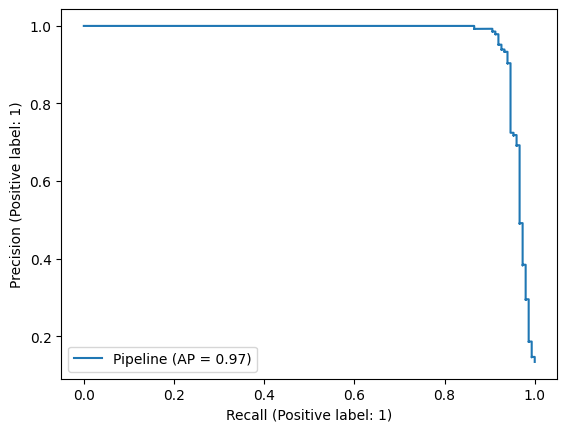

In [50]:
PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [51]:
y_pred =pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

#### Tf-Idf vectorizer

In [52]:
operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("naive_model", BernoulliNB(alpha=0.1))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vec',
                 TfidfVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('naive_model', BernoulliNB(alpha=0.1))])

In [53]:
print("NB MODEL")
eval(pipe_model, X_train, X_test)

NB MODEL
[[965   1]
 [ 14 135]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3859
           1       0.99      0.95      0.97       598

    accuracy                           0.99      4457
   macro avg       0.99      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457



In [54]:
operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("naive_model", BernoulliNB(alpha=0.1))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.983846
train_accuracy     0.991649
test_f1            0.936989
train_f1           0.968208
test_recall        0.899605
train_recall       0.947977
test_precision     0.978155
train_precision    0.989337
dtype: float64

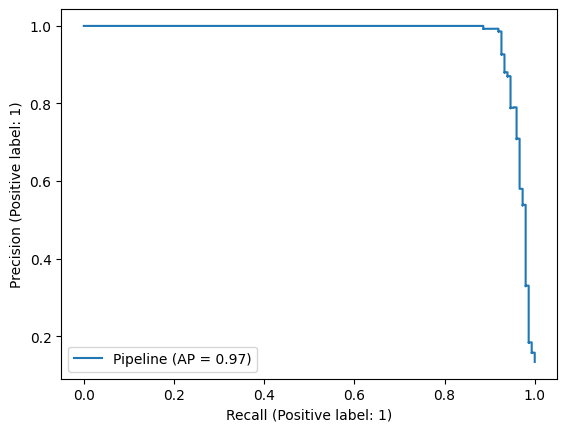

In [55]:
PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [56]:
y_pred = pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

### Pipeline for XGB

#### Countvectorizer

In [57]:
from xgboost import XGBClassifier

operations = [("count_vec", count_vectorizer),
              ("xgb_model", XGBClassifier(scale_pos_weight=1.5, random_state=42, learning_rate=0.3))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('count_vec',
                 CountVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=N...row_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [58]:
print("XGB MODEL")
eval(pipe_model, X_train, X_test)

XGB MODEL
[[960   6]
 [ 17 132]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3859
           1       0.99      0.93      0.96       598

    accuracy                           0.99      4457
   macro avg       0.99      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457



In [59]:
operations = [("count_vec", count_vectorizer),
              ("xgb_model", XGBClassifier(scale_pos_weight=1.5, random_state=42, learning_rate=0.3))]


model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.974197
train_accuracy     0.990203
test_f1            0.899595
train_f1           0.962320
test_recall        0.864435
train_recall       0.932552
test_precision     0.939507
train_precision    0.994068
dtype: float64

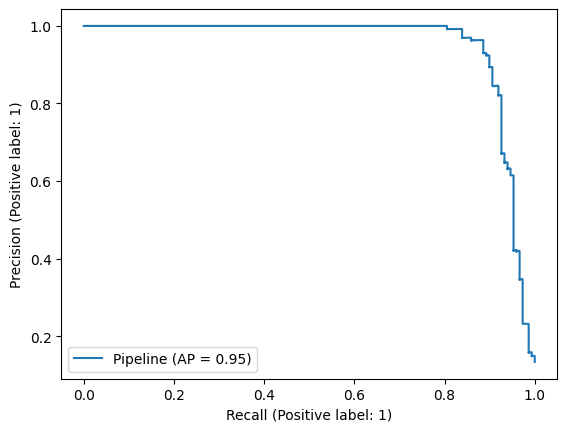

In [60]:
PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [61]:
y_pred =pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]

xgb_AP_count = average_precision_score(y_test, y_pred_proba)
xgb_count_rec = recall_score(y_test, y_pred)
xgb_count_f1 = f1_score(y_test,y_pred)

#### Tf-Idf vectorizer

In [62]:
from xgboost import XGBClassifier

operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("xgb_model", XGBClassifier(scale_pos_weight=1.5, random_state=42, learning_rate=0.2))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vec',
                 TfidfVectorizer(max_df=0.95, min_df=3,
                                 preprocessor=<function cleaning at 0x78ac5ace0a60>)),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=...row_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [63]:
print("XGB MODEL")
eval(pipe_model, X_train, X_test)

XGB MODEL
[[954  12]
 [ 21 128]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.86      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3859
           1       0.99      0.93      0.96       598

    accuracy                           0.99      4457
   macro avg       0.99      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457



In [64]:
operations = [("tf_idf_vec", tf_idf_vectorizer),
              ("xgb_model", XGBClassifier(scale_pos_weight=1.5, random_state=42, learning_rate=0.2))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.969035
train_accuracy     0.990826
test_f1            0.878503
train_f1           0.964796
test_recall        0.837627
train_recall       0.937197
test_precision     0.925404
train_precision    0.994092
dtype: float64

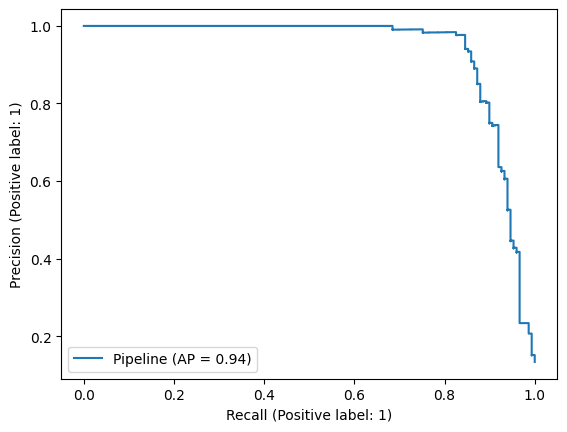

In [65]:
PrecisionRecallDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test);

In [66]:
y_pred = pipe_model.predict(X_test)
y_pred_proba= pipe_model.predict_proba(X_test)[:,1]


xgb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
xgb_tfidf_rec = recall_score(y_test, y_pred)
xgb_tfidf_f1 = f1_score(y_test,y_pred)

## DL Modeling

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM,Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

### Tokenization

In [69]:
num_words = 8921
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [70]:
tokenizer.fit_on_texts(X)

### Creating word index

In [71]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'will': 33,
 'if': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'home': 77,
 "i'll": 78,
 'need': 79,
 'about': 80,
 'r': 81,
 'lor': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [72]:
len(tokenizer.word_index)

8920

### Converting tokens to numeric

In [73]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents

In [74]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [75]:
max_tokens = max(num_tokens) #189

sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [76]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [77]:
X_pad.shape

(5572, 189)

### Train Set Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [96]:
model = Sequential()
embedding_size = 100

In [97]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [98]:
optimizer = Adam(learning_rate=0.005)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 189, 100)          892100    
                                                                 
 dropout_8 (Dropout)         (None, 189, 100)          0         
                                                                 
 lstm_6 (LSTM)               (None, 189, 100)          80400     
                                                                 
 dropout_9 (Dropout)         (None, 189, 100)          0         
                                                                 
 lstm_7 (LSTM)               (None, 189, 50)           30200     
                                                                 
 dropout_10 (Dropout)        (None, 189, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 25)               

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience =1,
                           restore_best_weights=True)

In [101]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.57748121, 3.72658863])

In [102]:
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=64,
          sample_weight=classes_weights,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
70/70 [==============================] - 17s 164ms/step - loss: 0.2161 - recall: 0.9030 - val_loss: 0.0782 - val_recall: 0.9664
Epoch 2/10
70/70 [==============================] - 6s 84ms/step - loss: 0.0341 - recall: 0.9883 - val_loss: 0.0584 - val_recall: 0.9530
Epoch 2: early stopping


### Model evaluation

In [103]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.216129,0.903010,0.078162,0.966443
1,0.034095,0.988294,0.058433,0.953020


<Axes: >

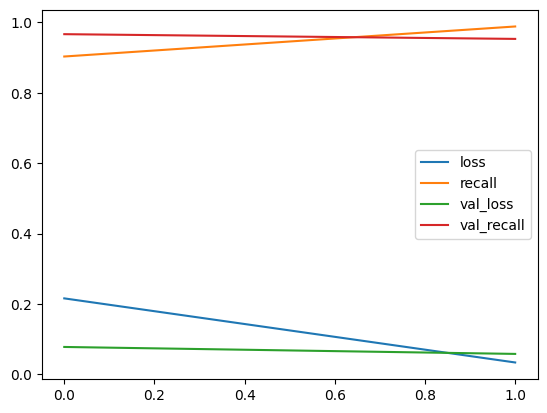

In [104]:
model_loss.plot()

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

35/35 [==============================] - 1s 12ms/step
[[955  11]
 [  5 144]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.97      0.95       149

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [106]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

140/140 [==============================] - 1s 8ms/step
[[3845   14]
 [  11  587]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       0.98      0.98      0.98       598

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457



35/35 [==============================] - 0s 12ms/step


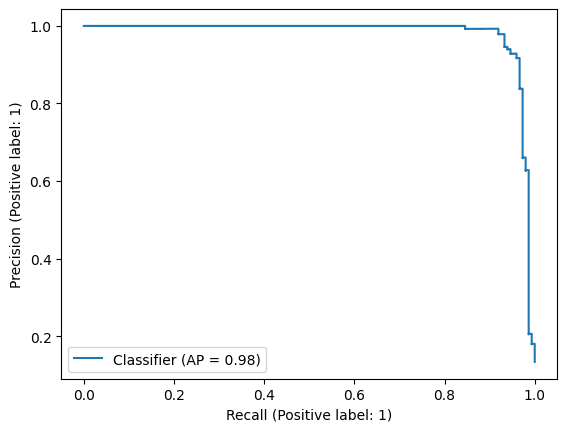

In [90]:
y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [107]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9801879822766355

In [108]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [124]:
!pip install transformers

In [128]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  238


In [129]:
sum(np.array(num_of_sent_tokens) <= 238) / len(num_of_sent_tokens)

1.0

### Train test split

In [130]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=101)

In [131]:
def transformation(X):
  # set array dimensions
  seq_len = 238

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [132]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [133]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (4457, 238)
Xmask_train.shape : (4457, 238)
Xids_test.shape   : (1115, 238)
Xmask_test.shape  : (1115, 238)


In [134]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [135]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [136]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(238,), dtype=tf.int64, name=None), TensorSpec(shape=(238,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [137]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(238,), dtype=tf.int64, name=None), TensorSpec(shape=(238,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [138]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [139]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Batch Size

In [140]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [141]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.1 MB/s eta 0:00:00


In [142]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [143]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(238,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(238,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(238, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [144]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall

#optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
loss = BinaryCrossentropy()
recall = Recall()
model3 = create_model()
model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [145]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 238)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 238)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 238, 7                                       

In [146]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
140/140 [==============================] - 257s 2s/step - loss: 0.2964 - recall: 0.8679 - val_loss: 0.0552 - val_recall: 0.9664
Epoch 2/3
140/140 [==============================] - 231s 2s/step - loss: 0.0719 - recall: 0.9649 - val_loss: 0.0551 - val_recall: 0.9463
Epoch 3/3
140/140 [==============================] - 231s 2s/step - loss: 0.0507 - recall: 0.9799 - val_loss: 0.0906 - val_recall: 0.9799


### Model evaluation

In [147]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.296448,0.867893,0.055231,0.966443
1,0.071866,0.964883,0.055096,0.946309
2,0.050680,0.979933,0.090614,0.979866


<Axes: >

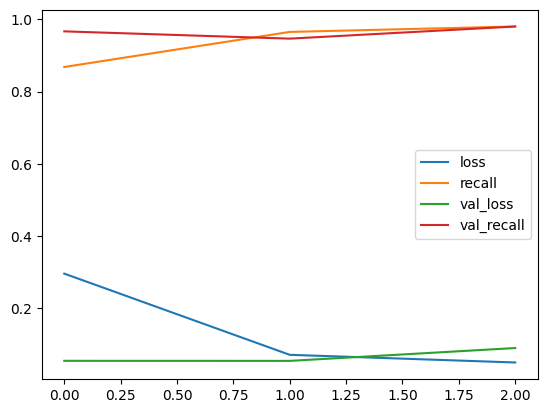

In [148]:
model_loss.plot()

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

35/35 [==============================] - 21s 527ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       966
           1       0.96      0.98      0.97       149

    accuracy                           0.99      1115
   macro avg       0.98      0.99      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [150]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

140/140 [==============================] - 74s 525ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      0.98      0.99       598

    accuracy                           1.00      4457
   macro avg       1.00      0.99      1.00      4457
weighted avg       1.00      1.00      1.00      4457



35/35 [==============================] - 18s 524ms/step


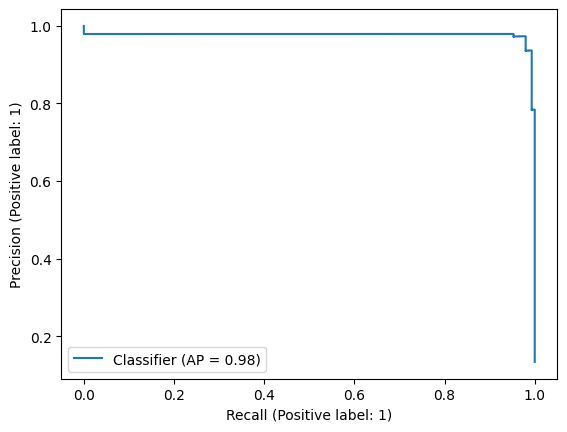

In [151]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [152]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

## Pre-Trained Model from Huggingface

Find a pre-trained model trained on ham-spam data from the huggingface website and apply it to your own data.

Below is an example model you can use.

https://huggingface.co/mshenoda/roberta-spam

0: ham
1: spam

In [110]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.5 MB/s eta 0:00:00


### Train-Test Split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=101)

In [112]:
from transformers import pipeline
classifier = pipeline(model="mshenoda/roberta-spam", task="text-classification", device="cuda:0")

In [116]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life."]
)

[{'label': 'LABEL_0', 'score': 0.9999971389770508}]

In [117]:
y_pred = []
y_pred_proba=[]
for i in X_test:
  if classifier(i)[0]['label']=='LABEL_0':
    y_pred.append(0)
    pred_proba_0=classifier(i)[0]['score'] # Probability of belonging to class 0
    y_pred_proba.append(1-pred_proba_0) # Probability of belonging to class 1
  else:
    y_pred.append(1)
    pred_proba_1=classifier(i)[0]['score']
    y_pred_proba.append(pred_proba_1) # Probability of belonging to class 1


In [46]:
np.array(y_pred)

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
np.array(y_pred_proba)

array([1.66893005e-06, 1.66893005e-06, 1.66893005e-06, ...,
       1.66893005e-06, 1.78813934e-06, 1.66893005e-06])

In [47]:
y_train_pred = []
for i in X_train:
  if classifier(i)[0]['label']=='LABEL_0':
    y_train_pred.append(0)
  else:
    y_train_pred.append(1)

In [48]:
np.array(y_train_pred)

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
print("TEST DATA")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      0.99      1.00       149

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115



In [51]:
print("TRAIN DATA")
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       0.99      0.99      0.99       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



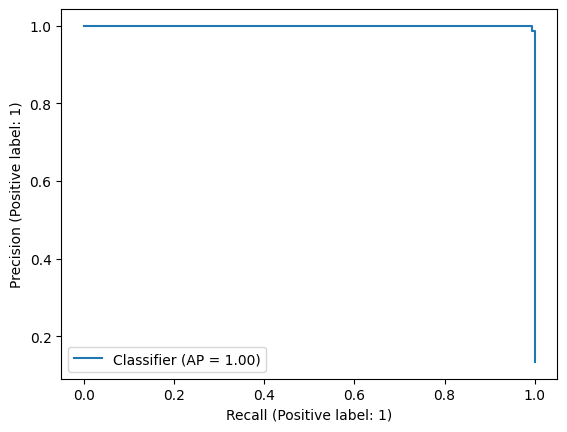

In [119]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [121]:
Pre_trained_AP = average_precision_score(y_test, y_pred_proba)
Pre_trained_f1 = f1_score(y_test, y_pred)
Pre_trained_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

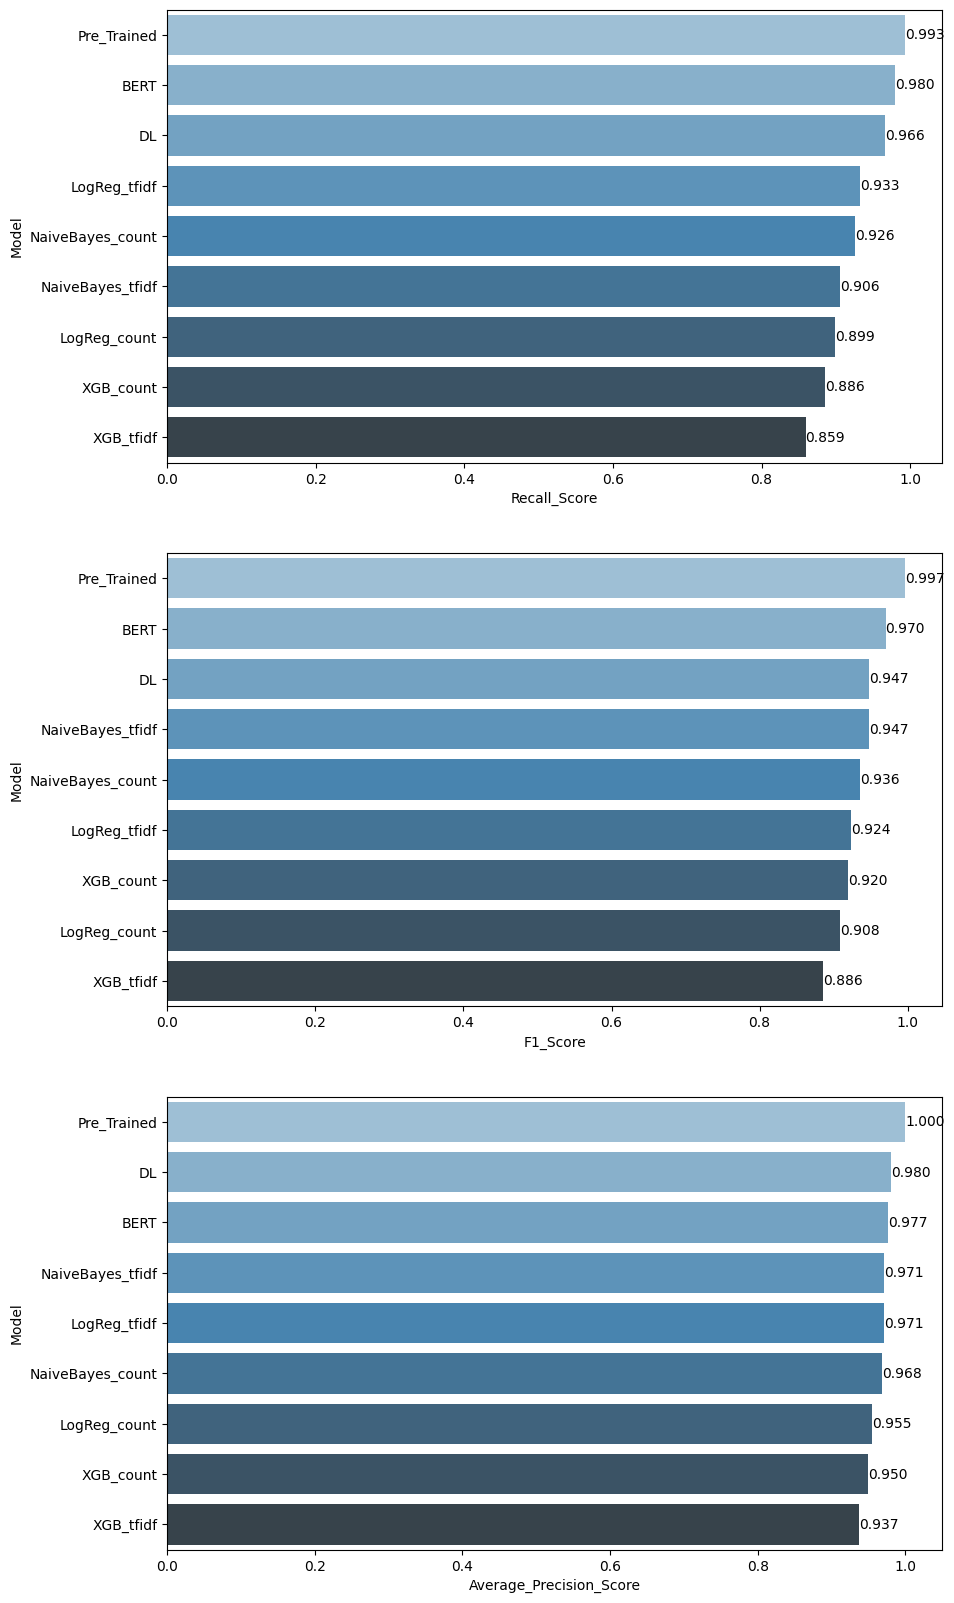

In [153]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "NaiveBayes_tfidf", "LogReg_tfidf",
                                  "XGB_count", "XGB_tfidf", "DL", "BERT", "Pre_Trained"],

                        "F1_Score": [nb_count_f1, log_count_f1, nb_tfidf_f1, log_tfidf_f1, xgb_count_f1, xgb_tfidf_f1,  DL_f1, BERT_f1, Pre_trained_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, nb_tfidf_rec, log_tfidf_rec, xgb_count_rec, xgb_tfidf_rec,  DL_rec, BERT_rec, Pre_trained_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, nb_AP_tfidf, log_AP_tfidf, xgb_AP_count, xgb_AP_tfidf, DL_AP, BERT_AP, Pre_trained_AP]})


plt.figure(figsize=(10,20))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

END OF THE PROJECT